# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

---

Ya que el objetivo del proyecto es ayudar a los tasadores inmobiliarios a evaluar mejor las propiedades las principales variables a tener en cuenta para mi concepto deben ser el **tipo de propiedad**, el **precio**, el **lugar**, y el **status**, por supuesto la correlacion de estas, y algunas otras correlaciones que permitan una mejor visualizacion de crecimiento del valor de las propiedades.

Tambien se debe preguntar en el desarrollo del proyecto de machine learning las preguntas apropiedad como cuales son las propiedades que demandan mas recursos, que varios poseen mas propiedades y de que tipo.

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  
from sklearn.svm import SVR
import math
from sklearn import preprocessing
from sklearn.feature_selection import RFE

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [8]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
data= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data = pd.DataFrame(data)
data.head()


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [9]:
data.shape  # Como se pidio en las correciones, este es el tamaño del dataset

(146660, 19)

In [10]:
#chequep si el dataset tiene los mismos atributos
print(list(data.columns))

['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type', 'operation_type']


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [11]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#Los valores faltantes por cada atributo del dataset 
data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


[None]

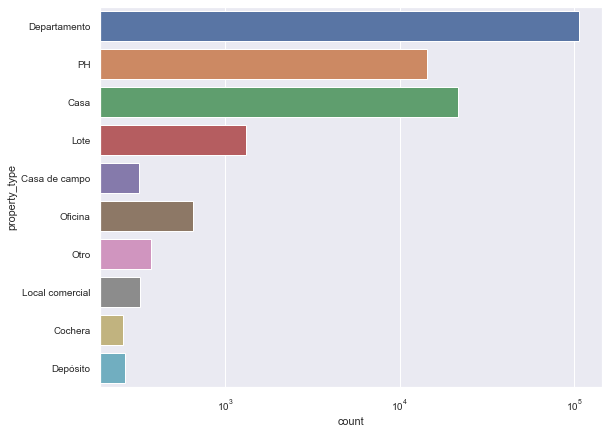

In [12]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
# Para el punto de correcion, aqui se muestra las instacias y el numero de las mismas 
print(data['property_type'].unique()) 
print(data['property_type'].value_counts())
fig, ax= plt.subplots(figsize= (9,7))
gr=sns.countplot(data = data, y = "property_type", ax=ax)
gr.set(xscale='log')


In [ ]:
# En este grafico podemos apreciar cada tipo de propiedad y la cantidad de las mismas en el dataset, 
#esta visualizado en Log para permitir una visualizacion de la grafica mas agradable 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


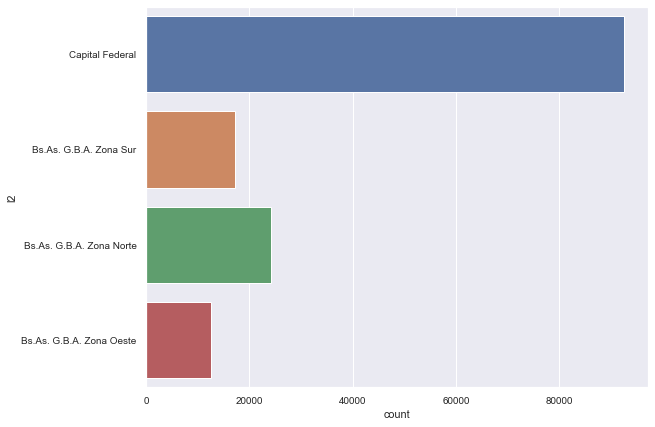

In [13]:
print(data['l2'].unique()) 
print(data['l2'].value_counts())
fig, ax= plt.subplots(figsize= (9,7))
gr=sns.countplot(data = data, y = "l2", ax=ax)

In [ ]:
#Este grafico muestra la instacias en L2, para observar cada region de Buenos Aires y sus cantidades, lo que nos
# permite observar que en Capital federal se encuentran la mayor cantidad de tipo de propiedades

Text(0, 0.5, 'Cantidad de listings')

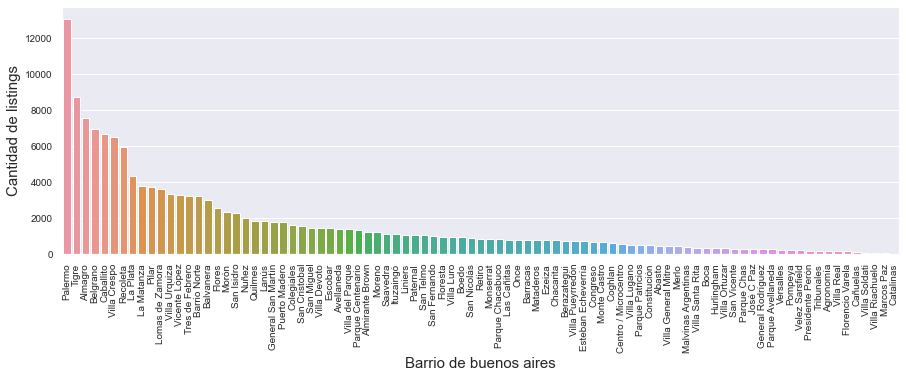

In [14]:
plt.figure(figsize= (15,10))
plt.subplot(2,1,2)
sns.countplot(data = data, x= 'l3', order = data.l3.value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Barrio de buenos aires', size=15)
plt.ylabel('Cantidad de listings', size=15)

In [ ]:
#En esta grafica podemos visualizar cuales son los barrios con masyor cantidad de propiedades en Buenos aires
# Palermo, tigre y Almagro con mayor cantidad de propiedades

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [15]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO


tipo_propiedad=['Departamento','PH','Casa']
region= ['Capital Federal']
mejores_propiedades = data[data.property_type.isin(tipo_propiedad) & data.l2.isin(region)]

mejores_propiedades.shape


(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [16]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
mejores_propiedades.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


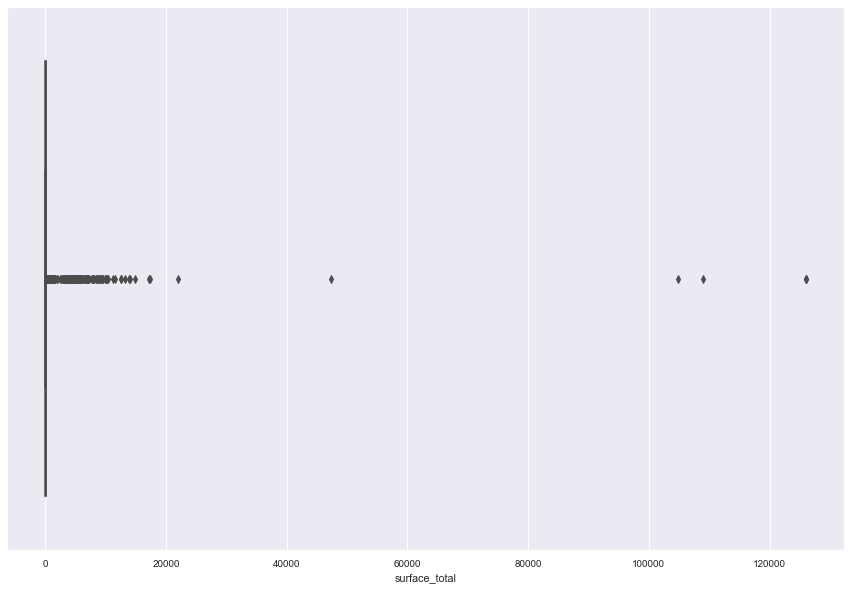

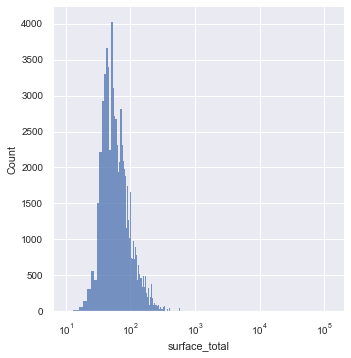

In [17]:
plt.figure(figsize= (15,10))
ax = sns.boxplot(x=mejores_propiedades['surface_total'])
sns.displot(mejores_propiedades['surface_total'])
plt.xscale('log')

In [ ]:
#En este boxplot lo usamos para observar los outliers en la superficie total

/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


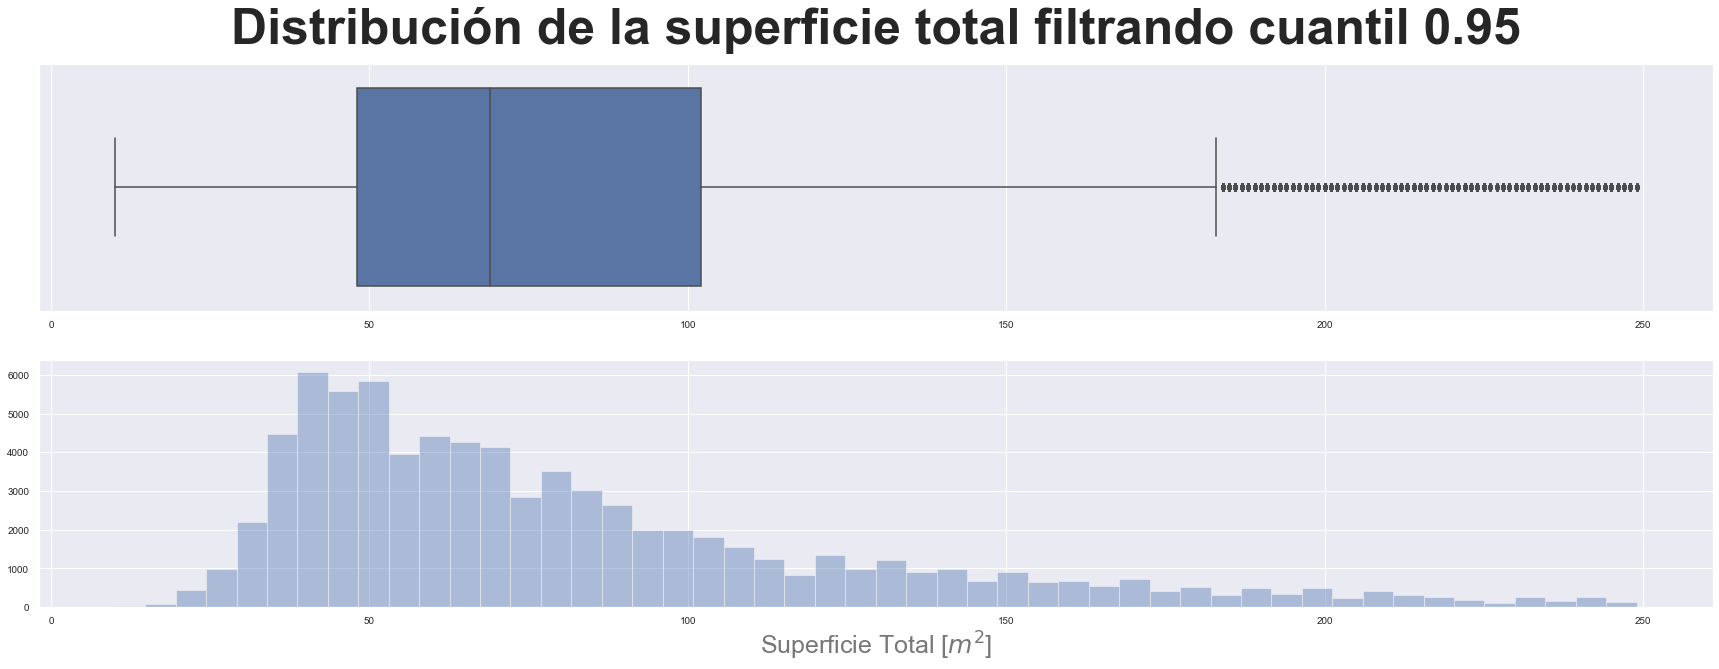

In [19]:
mask_eliminacion = mejores_propiedades['surface_total'] < mejores_propiedades['surface_total'].quantile(0.95)


plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(mejores_propiedades['surface_total'][mask_eliminacion])
plt.xlabel("")
plt.title('Distribución de la superficie total filtrando cuantil 0.95', weight=600, size = 50, pad = 20)
plt.subplot(2,1,2)
sns.distplot(mejores_propiedades['surface_total'][mask_eliminacion], kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 25, color='#777')
plt.savefig('Dist_sup_total_q95.png')
plt.show()

In [ ]:
#Se filtran los outliers por un 95%, dando como resultado, la filtacion de estos putliers altos, 
#y ahora se hace lo mismo para los valores minimos de 10 m2

In [20]:
mejores_propiedades= mejores_propiedades[mask_eliminacion]


In [21]:
mejores_propiedades.shape

(78437, 19)

In [22]:
mejores_propiedades.nsmallest(10,['surface_total'])

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
73182,2019-03-21,2019-10-18,2019-03-21,-34.677521,-58.488056,Argentina,Capital Federal,Villa Lugano,2.0,1.0,1.0,10.0,45.0,220000.0,USD,Venta PH en Villa Lugano Capital Federal Piedr...,"PH en Venta, Ph de 2 ambientes al frente con l...",PH,Venta
132438,2019-10-27,2020-01-31,2019-10-27,-34.568031,-58.453826,Argentina,Capital Federal,Belgrano,3.0,2.0,1.0,10.0,78.0,160000.0,USD,Venta Belgrano 3-4 ambientes planta baja 87 me...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,Departamento,Venta
48635,2019-08-31,2019-09-19,2019-08-31,-34.589872,-58.433498,Argentina,Capital Federal,Palermo,3.0,1.0,1.0,11.0,60.0,158000.0,USD,Luminoso PH 3 ambientes en Palermo Soho,Corredor Responsable: Flavia Aguirre - CUCICBA...,PH,Venta
57085,2019-07-03,2019-09-14,2019-07-03,-34.642898,-58.438550,Argentina,Capital Federal,Parque Chacabuco,2.0,1.0,1.0,11.0,73.0,161900.0,USD,Venta 2 amb estrenar cochera ameneties P.Chaca...,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento,Venta
89351,2019-06-26,2019-09-14,2019-06-26,-34.596326,-58.409799,Argentina,Capital Federal,Barrio Norte,4.0,3.0,2.0,11.0,125.0,476000.0,USD,Venta depto 4 ambIentes SEMIPISO B.NORTE,Corredor Responsable: Jorge Salafia - CUCICBA ...,Departamento,Venta
109366,2019-10-18,2020-02-23,2019-10-18,-34.603600,-58.431400,Argentina,Capital Federal,Parque Centenario,3.0,2.0,2.0,11.0,63.0,239000.0,USD,Venta de departamento 3 Amb. a ESTRENAR de 74 m2,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
44567,2020-01-16,2020-01-16,2020-01-16,-34.596617,-58.441768,Argentina,Capital Federal,Villa Crespo,4.0,3.0,2.0,12.0,115.0,275000.0,USD,"Venta Depto 4 amb c/dep, cochera y baulera!",Corredor Responsable: Veronica Grela Reina - C...,Departamento,Venta
92326,2019-01-26,2019-02-25,2019-01-26,-34.618616,-58.383483,Argentina,Capital Federal,San Telmo,1.0,1.0,NaN,12.0,12.0,13000.0,USD,Cochera a metros de AV 9 De Julio y Independencia,Corredor Responsable: JUAN FRANCISCO CARATTINO...,Departamento,Venta
12443,2019-12-20,9999-12-31,2019-12-20,-34.632946,-58.476650,Argentina,Capital Federal,Floresta,2.0,1.0,1.0,13.0,52.0,98000.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES FLORESTA,Corredor Responsable: GUILLERMO FRIMET - CUCIC...,Departamento,Venta
20534,2019-08-08,9999-12-31,2019-08-08,-34.551915,-58.461230,Argentina,Capital Federal,Belgrano,1.0,1.0,1.0,13.0,13.0,39000.0,USD,1 ambiente OPORTUNIDAD,OPORTUNIDAD 1 AMBIENTE<br>3 Piso por escalera<...,Departamento,Venta


In [23]:
mejores_propiedades.drop(['lon', 'lat', 'start_date', 'end_date', 'created_on', 'l1', 'currency', 'operation_type'],1, inplace = True)

In [24]:
mask_superficie = mejores_propiedades['surface_covered'] <= mejores_propiedades['surface_total']

mejores_propiedades= mejores_propiedades[mask_superficie]

In [25]:
mejores_propiedades.shape

(77223, 11)

In [26]:
mask_precio= mejores_propiedades['price']< mejores_propiedades['price'].quantile(0.95)
mejores_propiedades= mejores_propiedades[mask_precio]

/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


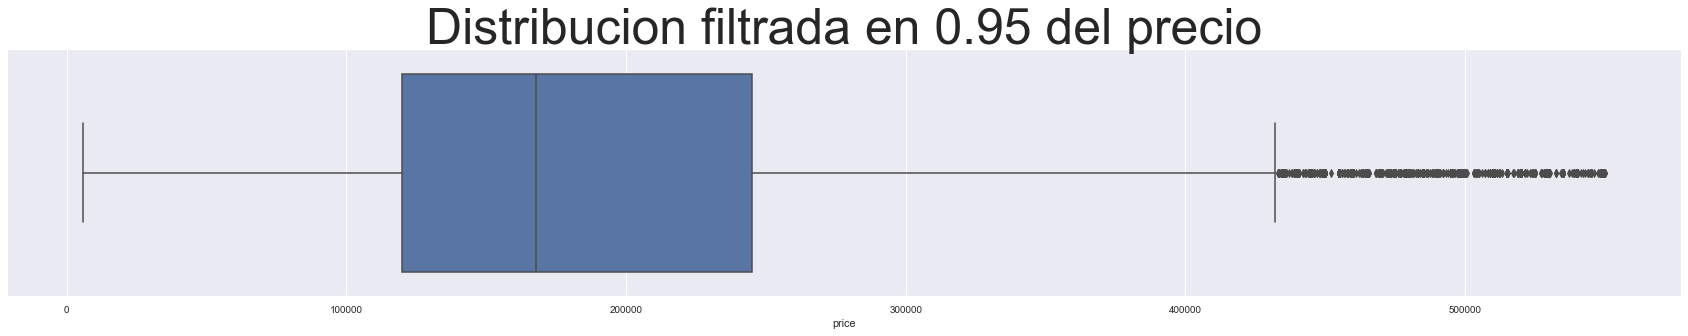

In [27]:
plt.figure(figsize=(30,10))
plt.subplot(2,1,1)
sns.boxplot(mejores_propiedades.price)
plt.title('Distribucion filtrada en 0.95 del precio', weight=300, size=50)

plt.show()

In [28]:
print('Ambientes:\n', mejores_propiedades.rooms.value_counts().sort_index())

Ambientes:
 1.0      6476
2.0     24375
3.0     24503
4.0     13820
5.0      3021
6.0       613
7.0       177
8.0       117
9.0        17
10.0       16
11.0        9
12.0        2
21.0        1
Name: rooms, dtype: int64


/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


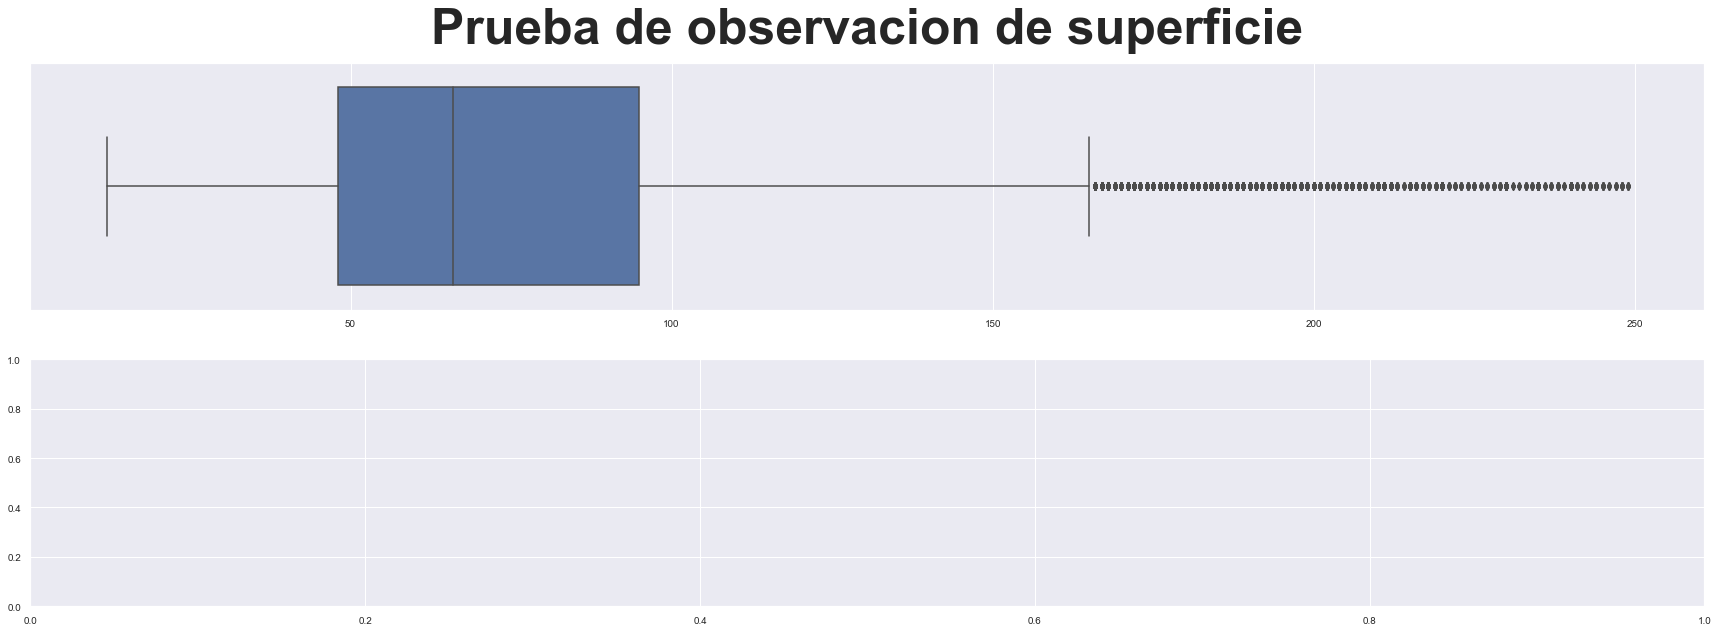

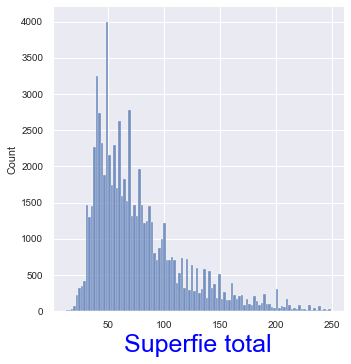

In [29]:
plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(mejores_propiedades['surface_total'][mask_superficie])
plt.xlabel("")
plt.title('Prueba de observacion de superficie', weight= 600, size= 50, pad=20)
plt.subplot(2,1,2)
sns.displot(mejores_propiedades['surface_total'][mask_superficie], kde = False)
plt.xlabel('Superfie total', size = 25, color= 'blue')
plt.show()


In [ ]:
# Se observa gracias a este box plot que despues de 180m2 empezarian los outlier evaluando la superficie total

In [30]:
mejores_propiedades = mejores_propiedades[mejores_propiedades['surface_total']<= 180]
mejores_propiedades.shape

(70864, 11)

In [31]:
print('las propiedades con mas de 7 ambientes representan el', 
     round((mejores_propiedades[mejores_propiedades.rooms>7].shape[0]/mejores_propiedades.rooms.shape[0])*100,2),'% de nuestro dataset')

las propiedades con mas de 7 ambientes representan el 0.15 % de nuestro dataset


In [32]:
mejores_propiedades = mejores_propiedades[mejores_propiedades.rooms < 8]
mejores_propiedades.shape

(70759, 11)

In [33]:
mejores_propiedades.bathrooms.value_counts().sort_index()

1.0     48476
2.0     17684
3.0      3335
4.0       499
5.0        22
10.0        4
11.0        3
12.0        1
14.0        3
Name: bathrooms, dtype: int64

In [34]:
print('las propiedades con mas de 5 baños representan el', 
     round((mejores_propiedades[mejores_propiedades.bathrooms>5].shape[0]/mejores_propiedades.bathrooms.shape[0])*100,2),'% de nuestro dataset')

las propiedades con mas de 5 baños representan el 0.02 % de nuestro dataset


In [35]:
mejores_propiedades= mejores_propiedades[mejores_propiedades.bathrooms <= 5]
mejores_propiedades.shape

(70016, 11)

In [36]:
mejores_propiedades.shape

(70016, 11)

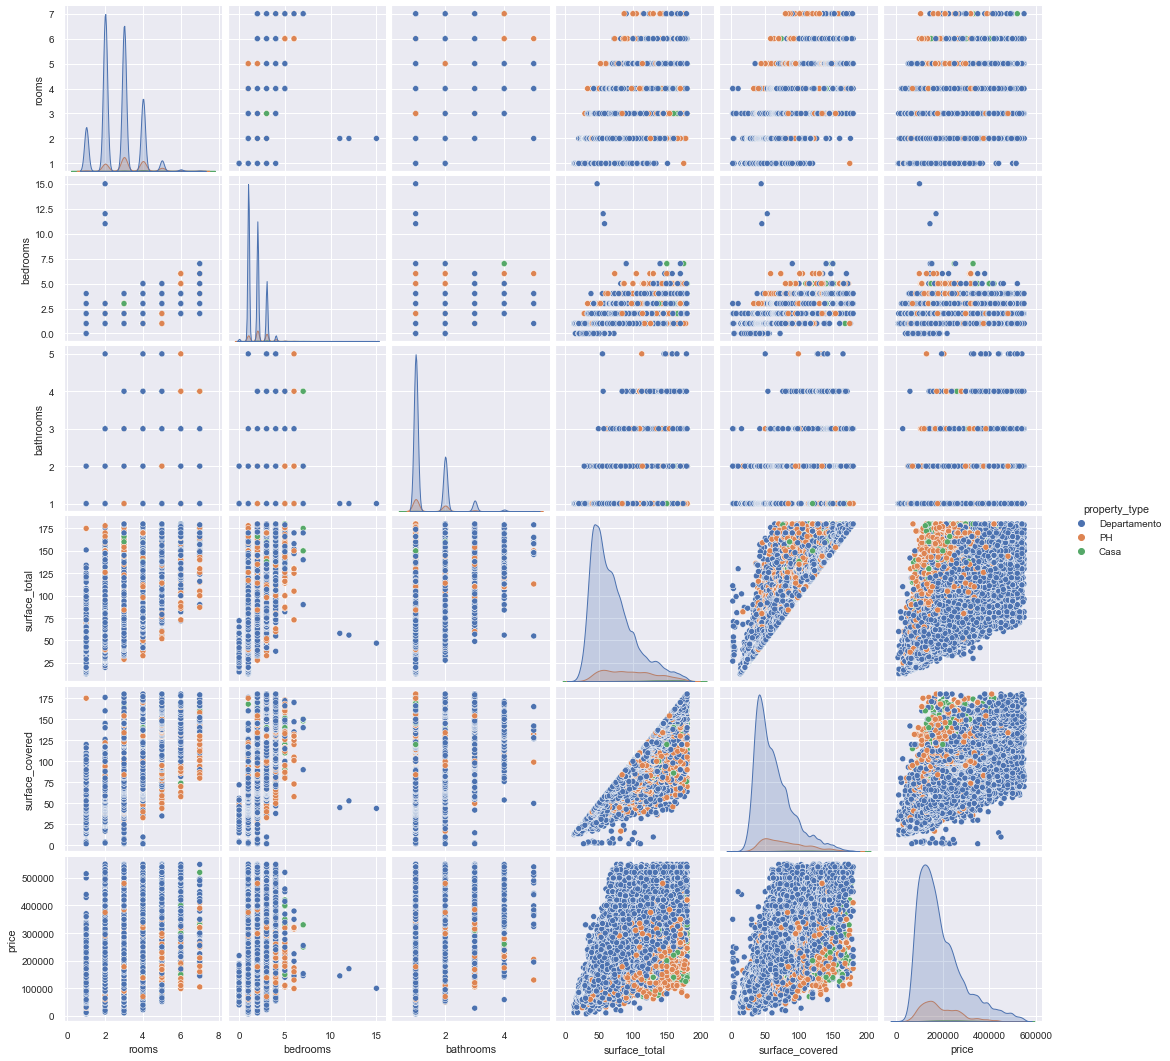

In [37]:
sns.pairplot(data=mejores_propiedades, hue='property_type')
plt.show()

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

<AxesSubplot:>

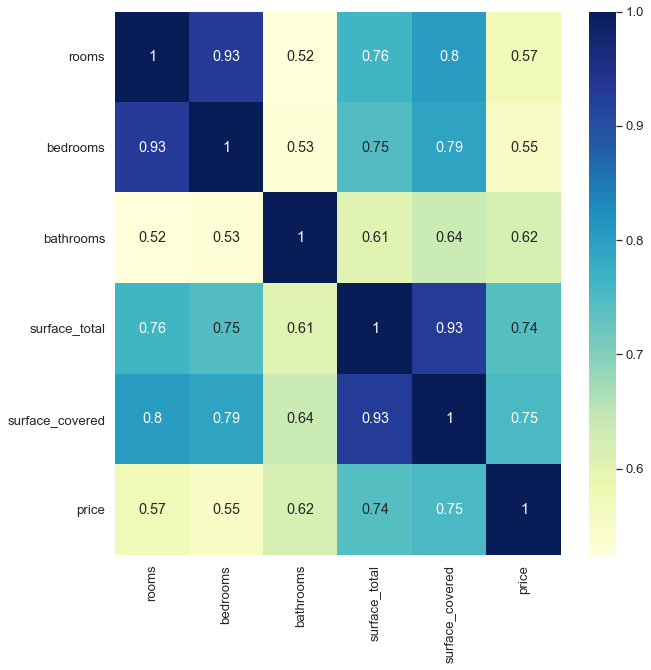

In [40]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
sns.set(font_scale = 1.2)
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(mejores_propiedades.corr(),cmap ="YlGnBu", annot= True, ax=ax)


In [ ]:
# a partir de la correclacion del dataset general podemos observar que las mejores variables 
#para predecir el precio son surface_total y surface_covered, por ser 0.74 y 0.75 respectivamente, 
#se puede apreciar tambien un relacion muy alta entre rooms y bedrooms, lo que podria implicar multicolinealidad

In [82]:
aptos = mejores_propiedades[mejores_propiedades.property_type == 'Departamento']
casas = mejores_propiedades[mejores_propiedades.property_type == 'Casa']
ph = mejores_propiedades[mejores_propiedades.property_type == 'PH']

<AxesSubplot:>

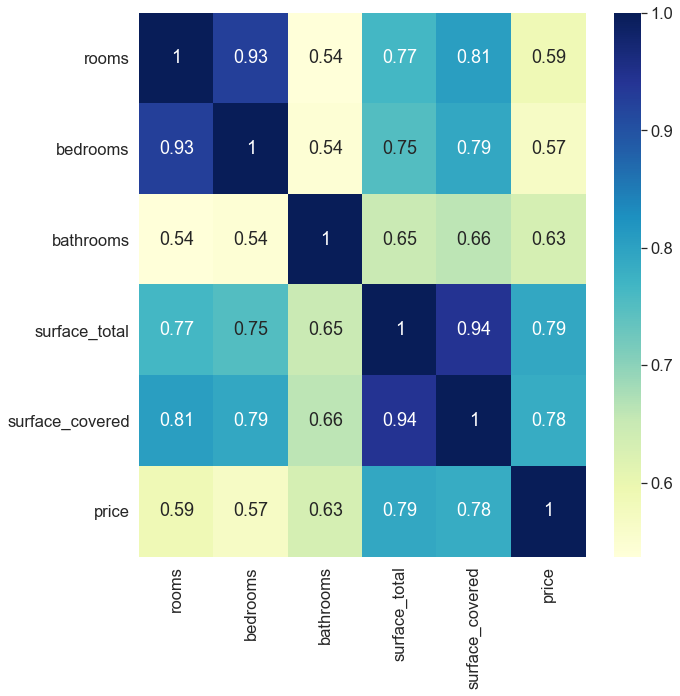

In [83]:
sns.set(font_scale = 1.5)
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(aptos.corr(), cmap = 'YlGnBu', annot= True, ax=ax)

<AxesSubplot:>

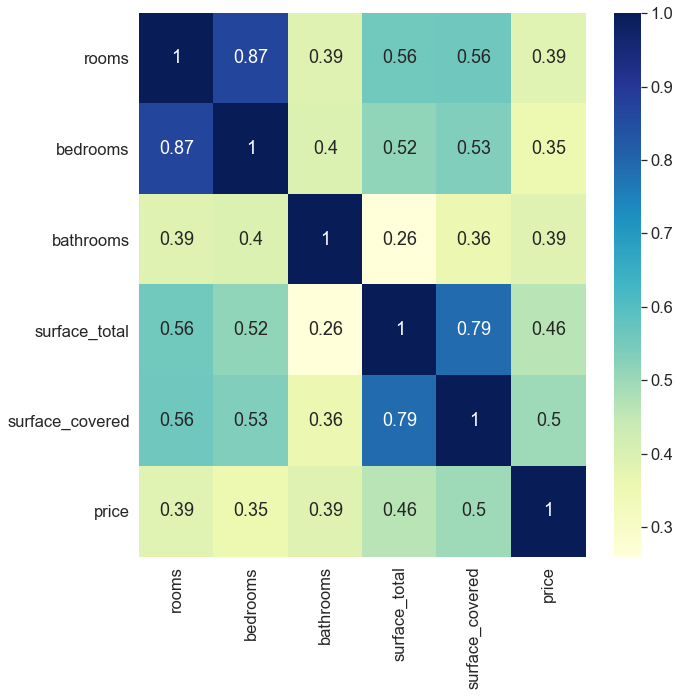

In [84]:
sns.set(font_scale = 1.5)
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(casas.corr(), cmap = 'YlGnBu', annot= True, ax=ax)

<AxesSubplot:>

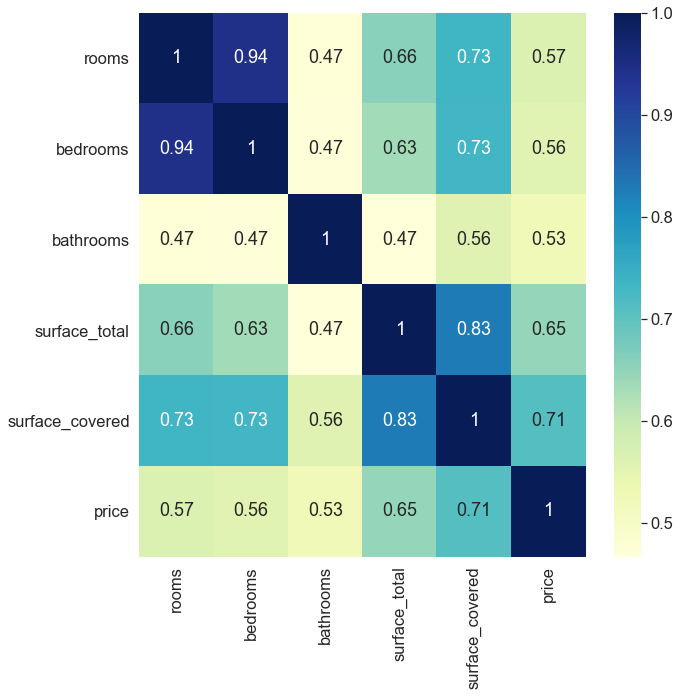

In [86]:
sns.set(font_scale = 1.5)
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(ph.corr(), cmap = 'YlGnBu', annot= True, ax=ax)

In [ ]:
#evaluando por cada tipo de propiedad mas popular, se puede determinar que las varibales 
#surface_total y surface_covered son las mas indicadas para enteder una correlacion con el precio

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [54]:
desafio = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
desafio.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [59]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
tipo_propiedad=['Departamento','PH','Casa']
region= ['Capital Federal']
desafio= desafio[desafio.property_type.isin(tipo_propiedad) & data.l2.isin(region)]

desafio.shape


(91485, 19)

In [62]:
desafio['precio_m2']= desafio['price']/desafio['surface_total']
desafio.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,precio_m2
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,1092.857143
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,2271.428571
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,2777.777778
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,3470.588235
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,2678.571429


In [66]:
table= pd.pivot_table(desafio, values = 'precio_m2', index=['l3'], aggfunc = np.mean)
baratos=table.sort_values('precio_m2', ascending = True).iloc[:5]
baratos

,precio_m2
l3,
Villa Soldati,823.464870
Pompeya,1242.145082
Villa Lugano,1250.707508
Villa Riachuelo,1397.215013
Parque Avellaneda,1495.427178


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [42]:
#Se utilizará la metrica RMSE para evaluar el modelo, dado que es estandar 
#para este tipo de modelos de regresion de precios. se Eliminarán los outlier.
#para llegar a una conclucion se deberá observar una disminucion del RMSE

In [43]:
dataE = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [44]:
dataE = dataE[((dataE['property_type'] == "Departamento") |
                  (dataE['property_type'] == "Casa") |
                  (dataE['property_type'] == "PH")) 
                  & (dataE['l2'] == "Capital Federal")]

In [45]:
superficie_min=15
superficie_max=1000

dataE = dataE[(dataE.surface_total <= 1000) &
                        (dataE.surface_total >= 15)]

In [46]:
dataE = dataE[(dataE.price <= 4000000)]

In [47]:
dataE.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [48]:
mask_cols_datset=["surface_total","surface_covered","bathrooms","bedrooms","price","rooms"]
dataE=dataE[mask_cols_datset]

In [49]:
dataE.head()

,surface_total,surface_covered,bathrooms,bedrooms,price,rooms
0,140.0,140.0,2.0,7.0,153000.0,7.0
1,70.0,58.0,2.0,1.0,159000.0,2.0
2,45.0,45.0,1.0,1.0,125000.0,2.0
3,85.0,50.0,1.0,1.0,295000.0,2.0
5,56.0,56.0,1.0,1.0,150000.0,2.0


In [50]:
dataE=dataE.dropna()

In [51]:
dataE.shape

(81019, 6)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [53]:
#El dataset se separaá en dos un 70% para entrenamiento y un 30% para testeo

In [54]:
x = dataE.drop(['price'], axis=1)
y = dataE['price']


In [55]:
x_train, x_test, y_train, y_test= train_test_split(
    x, y, test_size= 0.30, random_state= 42)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(56713, 5) (56713,) (24306, 5) (24306,)


In [56]:
# Se empieza a definir un modelo de regrecion lineal como benchmarl para el punto de inicio

lineal_regressor = LinearRegression()

In [57]:
lineal_regressor.fit(x_train, y_train)

LinearRegression()

In [58]:
y_train_pred_lin = lineal_regressor.predict(x_train)
y_test_pred_lin = lineal_regressor.predict(x_test)

In [59]:
rmse_lin_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_lin_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))

In [60]:
print(f'Raíz del error cuadrático medio en Regresión Lineal - Train: {rmse_lin_train}')
print(f'Raíz del error cuadrático medio en Regresión Lineal - Test: {rmse_lin_test}')

Raíz del error cuadrático medio en Regresión Lineal - Train: 199173.83253528475
Raíz del error cuadrático medio en Regresión Lineal - Test: 202449.36540361587


In [61]:
# Con el modelo planteado por la regrecion lineal podemos analizar que se tiene una media de $202449 usd,
#esto implica un modelo muy general y poca precision

In [62]:
#Se empieza a crear un arbol de regresion
tree_regressor = DecisionTreeRegressor()

In [63]:
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [64]:
y_train_pred_tree = tree_regressor.predict(x_train)
y_test_pred_tree = tree_regressor.predict(x_test)

In [65]:
#Se de be evaluar el RMSE
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_tree}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_tree}')

La raíz del error cuadrático medio en Train es de: 52460.90877279167
La raíz del error cuadrático medio en Test es de: 150680.67698171292


In [66]:
# en este punto mediante un for se creara lista de los diferentes errores según la profunddad del arbol, 
#esto se hace para medir cual es el punto del arbol mas efectivo y que contenga menos errores

In [67]:
list_rmse_train_tree = []
list_rmse_test_tree = []
rmse_train = 0
rmase__test = 0
max_depths = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59]

for i in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth = i)
    tree_reg.fit(x_train, y_train)
    
    y_train_pred_tree = tree_reg.predict(x_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
    
    y_test_pred_tree = tree_reg.predict(x_test)
    rmse_train = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
    
    list_rmse_train_tree.append(rmse_train)
    list_rmse_test_tree.append(rmse_test)
    

El minimo de RMSE en test es  146742.70196458782  en  19 profundidad del arbol.


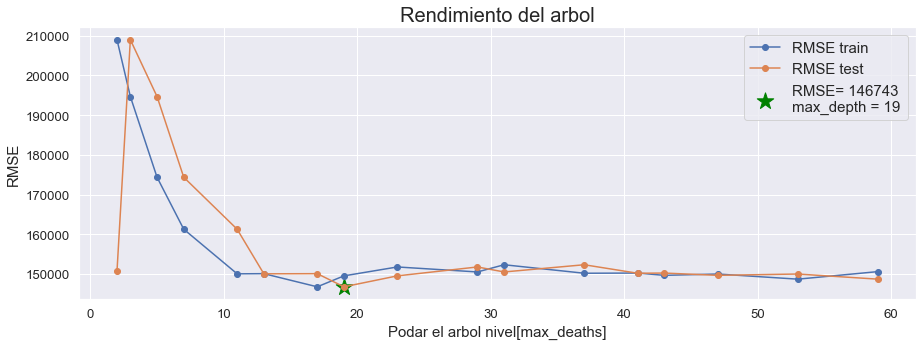

In [68]:
min_test_tree = np.amin(list_rmse_test_tree)
list_rmse_test_tree_op = list_rmse_test_tree.index(min(list_rmse_test_tree))
max_depths_op = max_depths[list_rmse_test_tree_op]
print('El minimo de RMSE en test es ', min_test_tree, ' en ', max_depths_op, 'profundidad del arbol.')

plt.figure(figsize = (15,5))

plt.plot(max_depths, list_rmse_train_tree, 'o-', label = 'RMSE train')
plt.plot(max_depths, list_rmse_test_tree, 'o-', label = 'RMSE test')
plt.xlabel('Podar el arbol nivel[max_deaths]', size=15)
plt.ylabel('RMSE', size = 15)
plt.title('Rendimiento del arbol', size= 20)
plt.scatter(max_depths_op, min_test_tree, s=300, marker = '*',
           label= 'RMSE= {} \nmax_depth = {}'.format(round(min_test_tree), max_depths_op), color = 'green')
plt.legend(loc = 'upper right', fontsize=15)
plt.show()

In [69]:
# Encontramos que el valor es de 18 niveles, asi que procedemos a entrenar el modelo con este numero de niveles

In [70]:
tree_regressor = DecisionTreeRegressor(max_depth = 18)
tree_regressor.fit(x_train, y_train)
y_train_pred_tree = tree_regressor.predict(x_train)
y_test_pred_tree = tree_regressor.predict(x_test)

rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_tree}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_tree}')

La raíz del error cuadrático medio en Train es de: 60301.53230817488
La raíz del error cuadrático medio en Test es de: 147526.56715117276


In [71]:
#los errores a comparacion de la regresion lineal son menores, de un $147293, peo claramente aun demasiado alto 
#para realizar una prediccion fiable y que ayude a la compañia y compradores 

In [72]:
# Modelo de vecinos
knn_regressor = KNeighborsRegressor()
knn_regressor

KNeighborsRegressor()

In [73]:
knn_regressor.fit(x_train, y_train)

y_train_pred_knn = knn_regressor.predict(x_train)
y_test_pred_knn =knn_regressor.predict(x_test)

In [74]:
#Se alimenta los datos y entrena el modelo

In [75]:
# Calculo del RMSE

rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_knn}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_knn}')

La raíz del error cuadrático medio en Train es de: 121318.48897678328
La raíz del error cuadrático medio en Test es de: 154992.51845436904


In [76]:
# En este punto haremos igual que con el arbol, analizaremos cual es el numero optimo de vecinos 

In [77]:
list_rmse_train_knn = []
list_rmse_test_knn = []
vecinos = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59]

for i in vecinos:
    knn_reg = KNeighborsRegressor(n_neighbors = i)
    knn_reg.fit(x_train, y_train)
    
    y_train_pred_knn = knn_reg.predict(x_train)
    knn_reg.fit(x_train, y_train)
    
    y_train_pred_knn = knn_reg.predict(x_train)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
    
    y_test_pred_knn = knn_reg.predict(x_test)
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
    
    list_rmse_train_knn.append(rmse_train_knn)
    list_rmse_test_knn.append(rmse_test_knn)
    

El minimo de RMSE en el test es  152156.63438892303 con vecinos 3


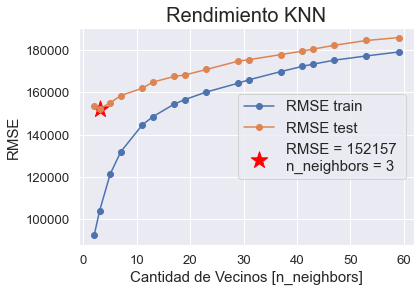

In [78]:
min_test_knn = np.amin(list_rmse_test_knn)
list_rmse_test_knn_op = list_rmse_test_knn.index(min(list_rmse_test_knn))
vecinos_op = vecinos[list_rmse_test_knn_op]

print('El minimo de RMSE en el test es ', min_test_knn,'con vecinos', vecinos_op)

plt.plot(vecinos, list_rmse_train_knn, 'o-', label = 'RMSE train')
plt.plot(vecinos, list_rmse_test_knn, 'o-', label = 'RMSE test')
plt.xlabel('Cantidad de Vecinos [n_neighbors]', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Rendimiento KNN', size = 20)
plt.scatter(vecinos_op, min_test_knn, s=300, marker = '*', 
         label = 'RMSE = {} \nn_neighbors = {} '.format(round(min_test_knn),vecinos_op), color = 'red')
plt.legend(loc = 'center right', fontsize = 15)
plt.savefig('KNN1.png')

plt.show()

In [79]:
#podemos interpretar de los datos obtenidos y a grafica que el metodo debe entrnarse con 3 vecinos 

In [80]:
knn_regressor = KNeighborsRegressor(n_neighbors = 3)
knn_regressor.fit(x_train, y_train)
y_train_pred_knn = knn_regressor.predict(x_train)
y_test_pred_knn = knn_regressor.predict(x_test)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_knn}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_knn}')

La raíz del error cuadrático medio en Train es de: 103768.34851509715
La raíz del error cuadrático medio en Test es de: 152156.63438892303


In [81]:
print(f'Raíz del error cuadrático medio en Regresión Lineal - Train: {rmse_lin_train}')
print(f'Raíz del error cuadrático medio en Regresión Lineal - Test: {rmse_lin_test}')
print(f'Raíz del error cuadrático medio en Árbol de Decisión - Train: {rmse_train_tree}')
print(f'Raíz del error cuadrático medio en Árbol de Decisión - Test: {rmse_test_tree}')
print(f'Raíz del error cuadrático medio en KNN - Train: {rmse_train_knn}')
print(f'Raíz del error cuadrático medio en KNN - Test: {rmse_test_knn}')

Raíz del error cuadrático medio en Regresión Lineal - Train: 199173.83253528475
Raíz del error cuadrático medio en Regresión Lineal - Test: 202449.36540361587
Raíz del error cuadrático medio en Árbol de Decisión - Train: 60301.53230817488
Raíz del error cuadrático medio en Árbol de Decisión - Test: 147526.56715117276
Raíz del error cuadrático medio en KNN - Train: 103768.34851509715
Raíz del error cuadrático medio en KNN - Test: 152156.63438892303


In [82]:
# Este modelo presenta errores mayores al metodo de arbol, y por ende muy por encima de un modelo que permita
#un prediccion fiable

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 60301.53230817488
Raíz del error cuadrático medio en Test: 147526.56715117276


/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


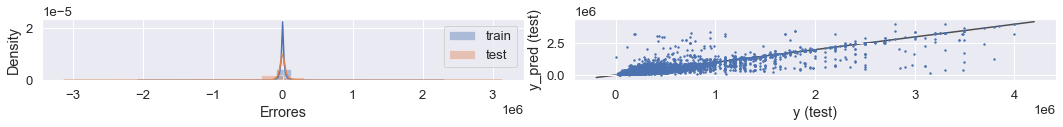

Modelo: Vecinos más cercanos - KNN
Raíz del error cuadrático medio en Train: 103768.34851509715
Raíz del error cuadrático medio en Test: 152156.63438892303


/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


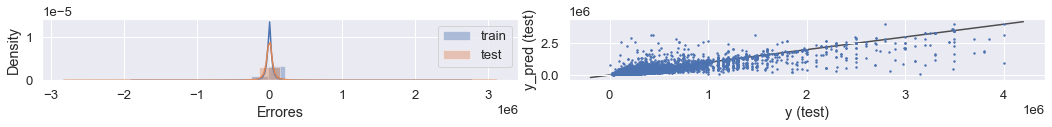

Modelo: Regresión Lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361587


/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jimmy/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


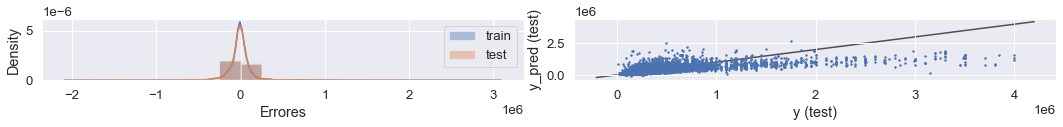

In [83]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos - KNN', 'Regresión Lineal',]

for i, model in enumerate([tree_regressor, knn_regressor, lineal_regressor]):  
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,2))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('Errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [84]:
#Despues del anaotra razonlisis de los datos del dataset original, conocer las correlaciones entre las varibles
#se determino que la superficie total y cuvierta son las mas importantes, pero dado que esto es un dataset real 
#e inmobiliario la ubicacion y el nuemro de habitaciones son factores importantes para tender en cuenta 
#en un entrenamiento de un modelo y el testeo del mismo. 

#Se debe tener en cuenta que este data set contaba con algunos outliers que no se pueden determinar 
#si son errores o hay otra razon de los mismos, lo que podria afectar nuestra interpretacion de los datos

#Con respecto a los modelos, el mejor modelo es el modelo del arbol con un total de 18 niveles, es el que 
#presenta un error mas bajo, pero aun asi es muy alto para la vida normal, ademas de tener el error medio que es 
#de mas de $200000.Con ello se llega a una primera conclucion, la cual es que mas variables oueden ser parte
#del modelo de entrenamiento y que el analisis o metodologias actuales no son lo suficientemente robustas
#para predecir correctamente el modelo.




In [85]:
#Dado que las tres metodologias anteriores tienen errores tan grandes, se analizará el dataset bajo otra diferente, 
#la cual es la MUlTICOLINEALIDAD. El Factor de Inflación de Varianza (VIF, del inglés “Variance Inflation Factor”) 
#de una variable independiente es en un valor que indica el grado de indecencia de esa variable. Para obtener el 
#VIF en primer lugar ha de calcular la regresión lineal de una variable independiente frente a resto de variables
#independientes. Posteriormente se usa el R^2 de esta regresión para obtener el VIF de esta variable

#VIF = 1 ; las variables no estn correlacionadas
#VIF <5 ; Las variables estan correlacionadas
#VIF > 5 ; Las variables estan altamente correlacionadas y deben ser retiradas del modelo

In [86]:
X = dataE[["rooms","surface_covered","surface_total","bedrooms","bathrooms"]]
y = dataE["price"]

In [87]:
vif_data = pd.DataFrame() 
vif_data["features"] = X.columns 

In [88]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

In [89]:
print(vif_data)

          features        VIF
0            rooms  34.445126
1  surface_covered   1.513939
2    surface_total   5.950495
3         bedrooms  31.447220
4        bathrooms   7.229515


In [90]:
#Dado que existe una correlacion tan alta entre rooms y bedrooms uno de los dos puede ser eliminado

In [91]:
X = dataE[["rooms","surface_covered","surface_total","bathrooms"]]
vif_data = pd.DataFrame() 
vif_data["features"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

          features       VIF
0            rooms  8.241862
1  surface_covered  1.513915
2    surface_total  5.876055
3        bathrooms  7.202889


In [92]:
#Se presento una mejora en las correlaciones, auqnue unos siguen siendo alto, pero se decide a 
#trabajar con estos features

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [94]:
#standarscaler ayuda a normalizar los datos 

scale =preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [95]:
X_train.max(), X_test.max()

(97.59853231703266, 127.17397114656285)

In [96]:
#Nuevo benchmark
new_regressor = LinearRegression()


In [97]:
new_regressor.fit(X_train, y_train)

LinearRegression()

In [98]:
new_y_train_pred = new_regressor.predict(X_train)
new_y_test_pred=new_regressor.predict(X_test)

In [99]:
MAE_train=mean_absolute_error(y_train,y_train_pred_lin)
MAE_test=mean_absolute_error(y_test,y_test_pred_lin)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred_lin))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred_lin))

r2_train= metrics.r2_score(y_train, y_train_pred_lin)
r2_test= metrics.r2_score(y_test, y_test_pred_lin)

adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",MAE_train)
print("El MAE en test es:",MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",RMSE_train)
print("El RMSE en test es:",RMSE_test)
print("-------------------------------------------")
print("El r2 de train es:",r2_train)
print("El r2 de test es:",r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",adj_r2_train)
print("El r2 ajustado de test es:",adj_r2_test)

El MAE en train es: 96179.9902911635
El MAE en test es: 97191.465966204
-------------------------------------------
El RMSE en train es: 199173.83253528475
El RMSE en test es: 202449.36540361587
-------------------------------------------
El r2 de train es: 0.5517887107017188
El r2 de test es: 0.5514864358797198
-------------------------------------------
El r2 ajustado de train es: 0.5517570953184008
El r2 ajustado de test es: 0.5514126095245706


In [100]:
#KNN Y ARBOLES DE DECISION

new_arbol_regressor = DecisionTreeRegressor(random_state = 42)
new_knn_regressor=KNeighborsRegressor()

In [101]:
new_arbol_regressor.fit(X_train, y_train)
new_knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [102]:
y_arbol_pred_train = new_arbol_regressor.predict(X_train)
y_arbol_pred_test = new_arbol_regressor.predict(X_test)

y_knn_pred_train = new_knn_regressor.predict(X_train)
y_knn_pred_test = new_knn_regressor.predict(X_test)

In [103]:
arbol_MAE_train = mean_absolute_error(y_train, y_arbol_pred_train)
arbol_MAE_test = mean_absolute_error(y_test, y_arbol_pred_test)

arbol_RMSE_train = np.sqrt(mean_squared_error(y_train, y_arbol_pred_train))
arbol_RMSE_test = np.sqrt(mean_squared_error(y_test, y_arbol_pred_test))

arbol_r2_train = metrics.r2_score(y_train, y_arbol_pred_train)
arbol_r2_test = metrics.r2_score(y_test, y_arbol_pred_test)

arbol_adj_r2_train = 1 - ((1 - arbol_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
arbol_adj_r2_test = 1 - ((1 - arbol_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",arbol_MAE_train)
print("El MAE en test es:",arbol_MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",arbol_RMSE_train)
print("El RMSE en test es:",arbol_RMSE_test)
print("-------------------------------------------")
print("El r2 de train es:",arbol_r2_train)
print("El r2 de test es:",arbol_r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",arbol_adj_r2_train)
print("El r2 ajustado de test es:",arbol_adj_r2_test)

El MAE en train es: 24519.78887749031
El MAE en test es: 52237.583809437994
-------------------------------------------
El RMSE en train es: 54726.970341865905
El RMSE en test es: 148387.96158941317
-------------------------------------------
El r2 de train es: 0.9661607254791726
El r2 de test es: 0.7590427044943688
-------------------------------------------
El r2 ajustado de train es: 0.9661583385655435
El r2 ajustado de test es: 0.7590030423742082


In [104]:
knn_MAE_train = mean_absolute_error(y_train, y_knn_pred_train)
knn_MAE_test = mean_absolute_error(y_test, y_arbol_pred_test)

knn_RMSE_train=np.sqrt(mean_squared_error(y_train,y_knn_pred_train))
knn_RMSE_test=np.sqrt(mean_squared_error(y_test,y_knn_pred_test))

knn_r2_train= metrics.r2_score(y_train, y_knn_pred_train)
knn_r2_test= metrics.r2_score(y_test, y_knn_pred_test)

knn_adj_r2_train = 1 - ((1 - knn_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
knn_adj_r2_test = 1 - ((1 - knn_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",knn_MAE_train)
print("El MAE en test es:",knn_MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",knn_RMSE_train)
print("El RMSE en test es:",knn_RMSE_test)
print("-------------------------------------------")
print("El r2 de train es:",knn_r2_train)
print("El r2 de test es:",knn_r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",knn_adj_r2_train)
print("El r2 ajustado de test es:",knn_adj_r2_test)

El MAE en train es: 51146.807007211755
El MAE en test es: 52237.583809437994
-------------------------------------------
El RMSE en train es: 120066.00844567682
El RMSE en test es: 149870.50520168545
-------------------------------------------
El r2 de train es: 0.8371235194511571
El r2 de test es: 0.7542038451181322
-------------------------------------------
El r2 ajustado de train es: 0.837112030667878
El r2 ajustado de test es: 0.7541633865106869


Modelo: Regresión lineal
R2 en Train: 0.5448280656002384
R2 ajustado en train: 0.544795959235394
--------------------------
R2 en test: 0.5429082308158628
R2 ajustado en Test: 0.542832992468604
--------------------------
RMSE en train: 200714.44210210926
RMSE en test: 204376.2044582473


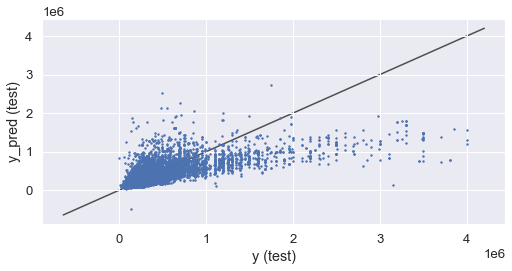

Modelo: Árbol de Decisión
R2 en Train: 0.9661607254791726
R2 ajustado en train: 0.9661583385655435
--------------------------
R2 en test: 0.7590427044943688
R2 ajustado en Test: 0.7590030423742082
--------------------------
RMSE en train: 54726.970341865905
RMSE en test: 148387.96158941317


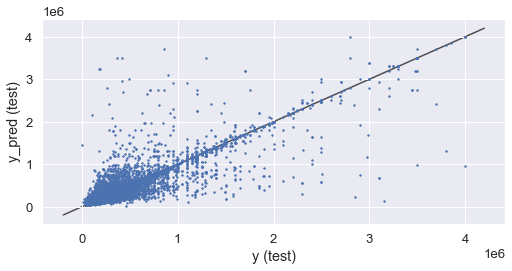

Modelo: Vecinos más cercanos
R2 en Train: 0.8371235194511571
R2 ajustado en train: 0.837112030667878
--------------------------
R2 en test: 0.7542038451181322
R2 ajustado en Test: 0.7541633865106869
--------------------------
RMSE en train: 120066.00844567682
RMSE en test: 149870.50520168545


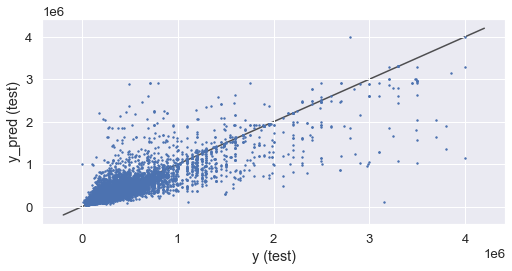

In [105]:
models = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([new_regressor, new_arbol_regressor, new_knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

    print("R2 en Train:", r2_train)
    print("R2 ajustado en train:", adj_r2_train)
    print("--------------------------")
    print("R2 en test:", r2_test)
    print("R2 ajustado en Test:", adj_r2_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

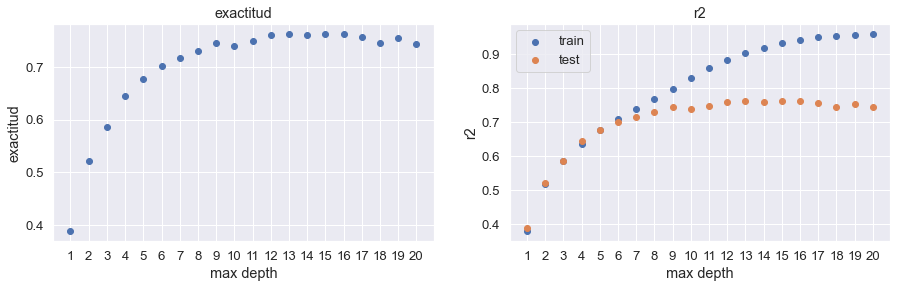

In [106]:
MAX_DEPTH_range = range(1, 21)
scores = []
arbol_r2_train_pred=[]
arbol_r2_test_pred=[]

for k in MAX_DEPTH_range:
    new_arbol_regressor = DecisionTreeRegressor(max_depth=k,random_state=42)
    new_arbol_regressor.fit(X_train, y_train)
    scores.append(new_arbol_regressor.score(X_test, y_test))
    
    y_train_pred = new_arbol_regressor.predict(X_train)
    arbol_r2_train = metrics.r2_score(y_train, y_train_pred)
    arbol_r2_train_pred.append(arbol_r2_train)
    
    y_test_pred = new_arbol_regressor.predict(X_test)
    arbol_r2_test = metrics.r2_score(y_test, y_test_pred)
    arbol_r2_test_pred.append(arbol_r2_test)
    

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(MAX_DEPTH_range,scores,marker="o")
ax2.scatter(MAX_DEPTH_range,arbol_r2_train_pred,marker="o",label="train")
ax2.scatter(MAX_DEPTH_range,arbol_r2_test_pred,marker="o",label="test")

ax1.set_xticks(MAX_DEPTH_range)
ax2.set_xticks(MAX_DEPTH_range)

ax2.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('max depth')
ax1.set_ylabel('exactitud')

ax2.set_title('r2')
ax2.set_xlabel('max depth')
ax2.set_ylabel('r2')

plt.show()

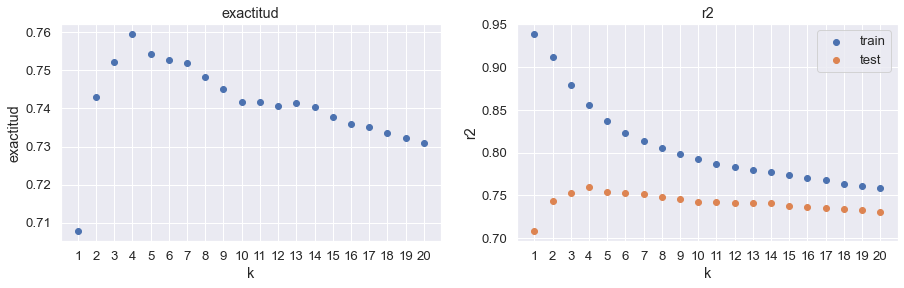

In [107]:
k_range = range(1, 21)
scores = []
r2_train_pred=[]
r2_train_test=[]

for k in k_range:
    new_knn_regressor = KNeighborsRegressor(n_neighbors = k)
    new_knn_regressor.fit(X_train, y_train)
    scores.append(new_knn_regressor.score(X_test, y_test))
    
    y_train_pred = new_knn_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = new_knn_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(k_range,scores,marker="o")
ax2.scatter(k_range,r2_train_pred,marker="o",label="train")
ax2.scatter(k_range,r2_train_test,marker="o",label="test")

ax1.set_xticks(k_range)
ax2.set_xticks(k_range)


ax2.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('k')
ax1.set_ylabel('exactitud')

ax2.set_title('r2')
ax2.set_xlabel('k')
ax2.set_ylabel('r2')

plt.show()

In [108]:
#Conclucion

#Arbol de decision: un nivel optimo del arbol es un nivel mas de lo que habiamos llegado con la 
#metodologia anterior, lo que da un resuktado de 19 niveles, otro factor es el R2 que presenta un pequeña mejora

#KNN: el numero optimo de vecinos es un vecino mas, (4) alli alcanza una buena exactitud, pero hay un error mas 
#bajo en el train pero mas alto en el test
    

In [109]:
new_arbol_optimo = DecisionTreeRegressor(max_depth= 19,random_state=42)
new_arbol_optimo.fit(X_train,y_train)

new_knn_optimo = KNeighborsRegressor(n_neighbors=4)
new_knn_optimo.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

Modelo: Regresión lineal
R2 en Train: 0.5448280656002384
R2 ajustado en train: 0.544795959235394
--------------------------
R2 en test: 0.5429082308158628
R2 ajustado en Test: 0.542832992468604
--------------------------
RMSE en train: 200714.44210210926
RMSE en test: 204376.2044582473


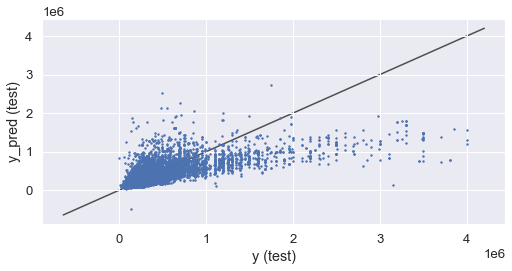

Modelo: Árbol de Decisión
R2 en Train: 0.9585691710990953
R2 ajustado en train: 0.9585662487016275
--------------------------
R2 en test: 0.7540545664790679
R2 ajustado en Test: 0.7540140833000183
--------------------------
RMSE en train: 60555.3747024378
RMSE en test: 149916.0084953472


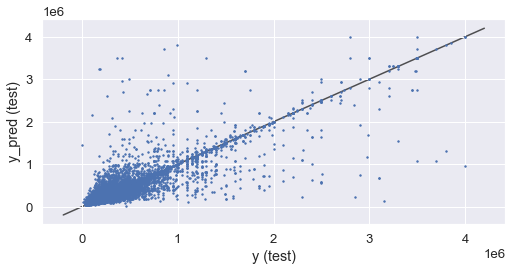

Modelo: Vecinos más cercanos
R2 en Train: 0.8559704357348517
R2 ajustado en train: 0.855960276352453
--------------------------
R2 en test: 0.7596403059061597
R2 ajustado en Test: 0.7596007421525539
--------------------------
RMSE en train: 112905.9184832846
RMSE en test: 148203.83787238054


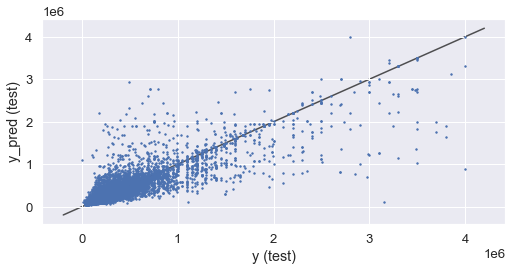

In [110]:
models = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([new_regressor, new_arbol_optimo, new_knn_optimo]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

    
    print("R2 en Train:", r2_train)
    print("R2 ajustado en train:", adj_r2_train)
    print("--------------------------")
    print("R2 en test:", r2_test)
    print("R2 ajustado en Test:", adj_r2_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Los tres modelos presentan mejoras, aun sin ser super eficientes y reales, son mas optimos que sus predecesores
# aunque aqui, dado los resultados de la optimizacion, la metodologia cambia, y escojemos la metodologia 
# de vecinos, pero no descartamos la metodologia de arbol, ya que son muy similares en valores.

#los resultados de test son mejores en la metodologia optimizada